In [1]:
] activate ../ 

In [5]:
using Revise
using AutomotiveDrivingModels
using AutoViz
using AutomotiveSensors
using AutomotivePOMDPs
using GridInterpolations

using POMDPPolicies

using JLD2
using FileIO
using Reel
using Random
using POMDPs
using POMDPModelTools
using LinearAlgebra


using Plots
using PGFPlots

┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/AutomotiveDrivingModels/ZEfHM.ji for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/AutoViz/w0rHu.ji for AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/AutomotiveSensors/NEFS3.ji for AutomotiveSensors [9ec66b5e-c605-11e8-1454-ede748df6f96]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/AutomotivePOMDPs/L1lsd.ji for AutomotivePOMDPs [dca8afc0-c686-11e8-0934-712707da73aa]
└ @ Base loading.jl:1187
┌ Info: Recompiling stale cache file /home/xubuntu/.julia/compiled/v1.0/JLD2/O1EyT.ji for JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1187


In [2]:
pgfplots()

Plots.PGFPlotsBackend()

┌ Warning: plot_CPCN_no_ped.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


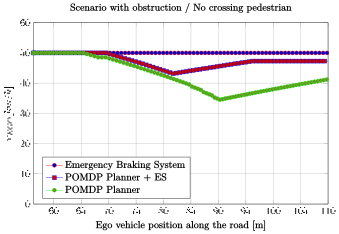

In [46]:
# CPCN no pedestrian

file_name = "simulation_results/CPCN/no_object/EmergencyBrakingSystem_CPCN_0.jld2"
@load file_name x v a
p1_v = PGFPlots.Linear(x, v*3.6, style="red", legendentry="Emergency Braking System")
p1_a = PGFPlots.Linear(x, a, style="red", mark="none", legendentry="ES")


file_name = "simulation_results/CPCN/no_object/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_CPCN_0.jld2"
@load file_name x v a
p2_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="POMDP Planner + ES")
p2_a = PGFPlots.Linear(x, a, style="blue", legendentry="POMDP Planner + ES")


file_name = "simulation_results/CPCN/no_object/PedestrianAvoidancePOMDP_CPCN_0.jld2"
@load file_name x v a
p3_v = PGFPlots.Linear(x, v*3.6, style="green", legendentry="POMDP Planner")
p3_a = PGFPlots.Linear(x, a, style="green", legendentry="POMDP Planner")



a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west", 
    ymin=0, ymax=60, xmin=x[1], xmax=110, title="Scenario with obstruction / No crossing pedestrian", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$v_{EGO}{[}km/h{]}$")
#L"$v_{EGO}{[}km/h{]}$
#"Scenario with obstruction / No crossing pedestrian"
push!(a1, p1_v)
push!(a1, p2_v)
push!(a1, p3_v)

PGFPlots.save("plot_CPCN_no_ped.pdf", a1)
figure_cpcn_no_ped = a1

┌ Warning: plot_CPCN.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


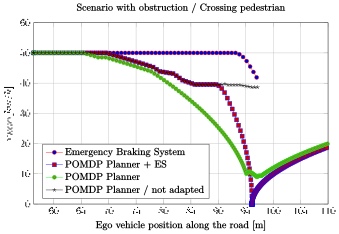

In [47]:
# CPCN crossing pedestrian

file_name = "simulation_results/CPCN/EmergencyBrakingSystem_CPCN_0.jld2"
@load file_name x v a
p1_v = PGFPlots.Linear(x, v*3.6, style="red", legendentry="Emergency Braking System")
p1_a = PGFPlots.Linear(x, a, style="red", mark="none", legendentry="ES")


file_name = "simulation_results/CPCN/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_CPCN_0.jld2"
@load file_name x v a
p2_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="POMDP Planner + ES")
p2_a = PGFPlots.Linear(x, a, style="blue", legendentry="POMDP Planner + ES")


file_name = "simulation_results/CPCN/PedestrianAvoidancePOMDP_CPCN_0.jld2"
@load file_name x v a
p3_v = PGFPlots.Linear(x, v*3.6, style="green", legendentry="POMDP Planner")
p3_a = PGFPlots.Linear(x, a, style="green", legendentry="POMDP Planner")

file_name = "simulation_results/CPCN/PedestrianAvoidancePOMDP_CPCN_0_collision.jld2"
@load file_name x v a
p4_v = PGFPlots.Linear(x, v*3.6, style="black", legendentry="POMDP Planner / not adapted")
p4_a = PGFPlots.Linear(x, a, style="green", legendentry="POMDP Planner / not adapted")


a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west", 
    ymin=0, ymax=60, xmin=x[1], xmax=110, title="Scenario with obstruction / Crossing pedestrian", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$v_{EGO}{[}km/h{]}$")

push!(a1, p1_v)
push!(a1, p2_v)
push!(a1, p3_v)
push!(a1, p4_v)

PGFPlots.save("plot_CPCN.pdf", a1)
figure_cpcn_ped = a1

┌ Warning: plot_CPCN_ped_no_ped.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


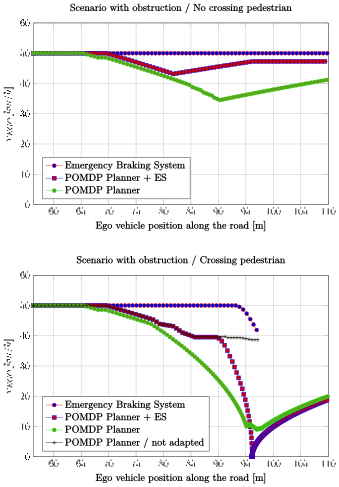

In [48]:
g = GroupPlot(1, 2, groupStyle = "horizontal sep = 4cm, vertical sep = 2.5cm")
push!(g, figure_cpcn_no_ped)
push!(g, figure_cpcn_ped)
PGFPlots.save("plot_CPCN_ped_no_ped.pdf", g)
g

┌ Warning: plot_scenarios_Emergency_System.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


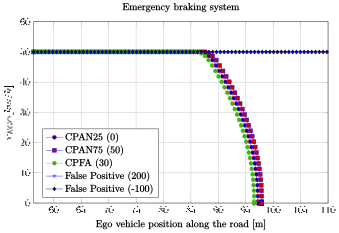

In [15]:
# general scenarios Emergency Braking System

file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_CPAN25_0.jld2"
@load file_name x v a
p1_v = PGFPlots.Linear(x, v*3.6, style="red", legendentry="CPAN25 (0)")
p1_a = PGFPlots.Linear(x, a, style="red", mark="none", legendentry="CPAN25 (0)")


file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_CPAN75_50.jld2"
@load file_name x v a
p2_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="CPAN75 (50)")
p2_a = PGFPlots.Linear(x, a, style="blue", mark="none", legendentry="CPAN75 (50)")


file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_CPFA_30.jld2"
@load file_name x v a
p3_v = PGFPlots.Linear(x, v*3.6, style="green", legendentry="CPFA (30)")
p3_a = PGFPlots.Linear(x, a, style="green", mark="none", legendentry="CPFA (30)")


file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_FP_left.jld2"
@load file_name x v a
p4_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="False Positive (200)")
p4_a = PGFPlots.Linear(x, a, style="blue", mark="none", legendentry="False Positive (200)")

file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_FP_right.jld2"
@load file_name x v a
p5_v = PGFPlots.Linear(x, v*3.6, style="black", legendentry="False Positive (-100)")
p5_a = PGFPlots.Linear(x, a, style="black", legendentry="False Positive (-100)")



a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west", 
    ymin=0, ymax=60, xmin=x[1], xmax=110, title="Emergency braking system", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$v_{EGO}{[}km/h{]}$")

push!(a1, p1_v)
push!(a1, p2_v)
push!(a1, p3_v)
push!(a1, p4_v)
push!(a1, p5_v)
PGFPlots.save("plot_scenarios_Emergency_System.pdf", a1)


figure_es_v = a1


┌ Warning: plot_scenarios_POMDP_v.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253
┌ Warning: plot_scenarios_POMDP_a.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253
┌ Warning: plot_scenarios_POMDP_ES_combined_v.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


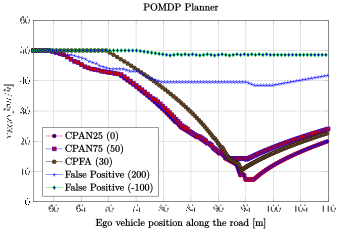

In [16]:
# general scenarios POMDP

file_name = "simulation_results/general_scenarios/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_CPAN25_0.jld2"
@load file_name x v a
p1_v = PGFPlots.Linear(x, v*3.6, style="red", legendentry="CPAN25 (0)")
p1_a = PGFPlots.Linear(x, a, style="red", mark="none")#, legendentry="CPAN25 (0)")


file_name = "simulation_results/general_scenarios/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_CPAN75_50.jld2"
@load file_name x v a
p2_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="CPAN75 (50)")
p2_a = PGFPlots.Linear(x, a, style="blue", mark="none")#,legendentry="CPAN75 (50)")


file_name = "simulation_results/general_scenarios/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_CPFA_30.jld2"
@load file_name x v a
p3_v = PGFPlots.Linear(x, v*3.6, style="black", legendentry="CPFA (30)")
p3_a = PGFPlots.Linear(x, a, style="black", mark="none")#, legendentry="CPFA (30)")


file_name = "simulation_results/general_scenarios/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_FP_left.jld2"
@load file_name x v a
p4_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="False Positive (200)")
p4_a = PGFPlots.Linear(x, a, style="blue", mark="none")#, legendentry="False Positive (200)")

file_name = "simulation_results/general_scenarios/PedestrianAvoidancePOMDP_EmergencyBrakingSystem_FP_right.jld2"
@load file_name x v a
p5_v = PGFPlots.Linear(x, v*3.6, style="green", legendentry="False Positive (-100)")
p5_a = PGFPlots.Linear(x, a, style="green", mark="none")#, legendentry="False Positive (-100)")



file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_CPFA_30.jld2"
@load file_name x v a
p11_v = PGFPlots.Linear(x, v*3.6, style="green", legendentry="ES - CPFA (30)")
p11_a = PGFPlots.Linear(x, a, style="green", mark="none", legendentry="CPFA (30)")


file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_FP_left.jld2"
@load file_name x v a
p12_v = PGFPlots.Linear(x, v*3.6, style="blue", legendentry="ES - False Positive (200)")
p12_a = PGFPlots.Linear(x, a, style="blue", mark="none", legendentry="False Positive (200)")

file_name = "simulation_results/general_scenarios/EmergencyBrakingSystem_FP_right.jld2"
@load file_name x v a
p13_v = PGFPlots.Linear(x, v*3.6, style="black", legendentry="ES - False Positive (-100)")
p13_a = PGFPlots.Linear(x, a, style="black", legendentry="False Positive (-100)")


a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west", 
    ymin=0, ymax=60, xmin=x[1], xmax=110, title="POMDP Planner", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$v_{EGO}{[}km/h{]}$")

push!(a1, p1_v)
push!(a1, p2_v)
push!(a1, p3_v)
push!(a1, p4_v)
push!(a1, p5_v)
PGFPlots.save("plot_scenarios_POMDP_v.pdf", a1)


figure_pomdp_v = a1


a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west",
    ymin=-12, ymax=2, xmin=x[1], xmax=110, title="POMDP Planner", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$a_{EGO}{[}m/s2{]}$")

push!(a1, p1_a)
push!(a1, p2_a)
push!(a1, p3_a)
push!(a1, p4_a)
push!(a1, p5_a)
PGFPlots.save("plot_scenarios_POMDP_a.pdf", a1)


figure_pomdp_a = a1



a1 = PGFPlots.Axis(style="width=12cm, height=8cm, grid=both", legendPos="south west", 
    ymin=0, ymax=60, xmin=x[1], xmax=110, title="POMDP Planner", 
     xlabel="Ego vehicle position along the road [m]", ylabel=L"$v_{EGO}{[}km/h{]}$")

push!(a1, p1_v)
push!(a1, p2_v)
push!(a1, p3_v)
push!(a1, p4_v)
push!(a1, p5_v)
push!(a1, p11_v)
push!(a1, p12_v)
push!(a1, p13_v)
PGFPlots.save("plot_scenarios_POMDP_ES_combined_v.pdf", a1)



figure_pomdp_v

┌ Warning: plot_scenarios_ES_POMDP_v.pdf already exists, overwriting!
└ @ TikzPictures /home/xubuntu/.julia/packages/TikzPictures/b9irC/src/TikzPictures.jl:253


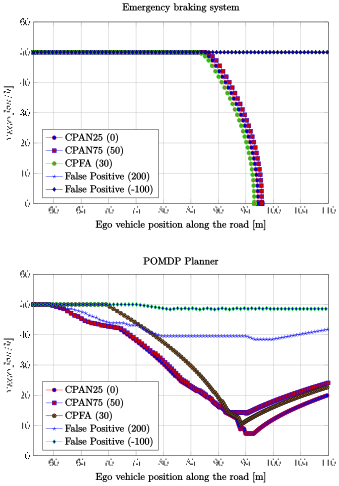

In [17]:
g = GroupPlot(1, 2, groupStyle = "horizontal sep = 4cm, vertical sep = 2.5cm")
push!(g, figure_es_v)
push!(g, figure_pomdp_v)
PGFPlots.save("plot_scenarios_ES_POMDP_v.pdf", g)
g